In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pywt

from sklearn.metrics import mean_squared_error
from PIL import Image
from utils import load_image, piecewise_smooth_function, add_noise, modify_denoised_coefs, denoising_with_wavedec, denoising_with_swt, plot_images, calculate_snr, create_mask, plot_signals, wavelet_inpainting

# 2 - Wavelet-based Denoising

## 2.1 A Univariate Functions with Noise

### Q2.1

Generate Function and Data Points

In [318]:
N = 2**10

x = np.linspace(-2, 2, N)
f_vector = piecewise_smooth_function(x)

Apply DWT, returns coefficeints

In [319]:
wavelet_type = 'db2'
level = 2
coeffs, _, _, _, _ = denoising_with_wavedec(f_vector, 
                                            wavelet = wavelet_type, 
                                            level = level,
                                            image = False)

Plot the coefficients and the original signal

513

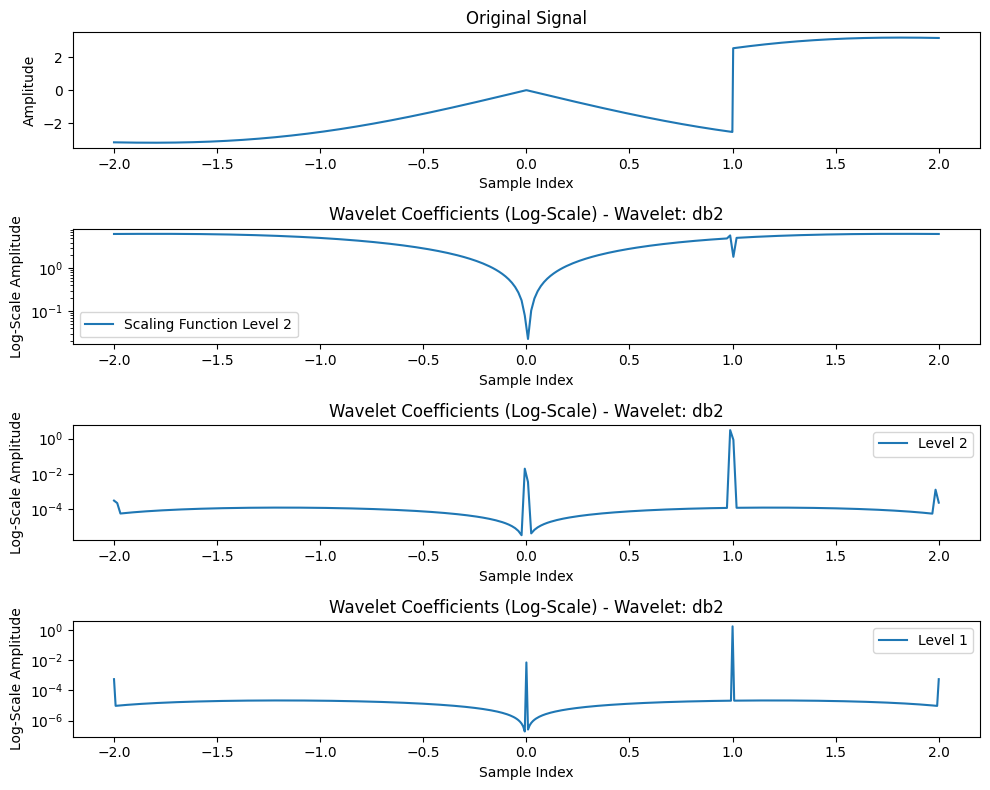

In [330]:
# change x axis and labels

plt.figure(figsize=(10,8))
plt.subplot(4, 1, 1)

plt.plot(x, f_vector)
plt.title('Original Signal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
for i, coef in enumerate(coeffs):
    plt.subplot(4, 1, i+2)
    if i == 0:
        plt.semilogy(np.linspace(-2,2, len(coef)), np.abs(coef), label=f'Scaling Function Level {len(coeffs)-1}')
        plt.title(f'Scaling Coefficients (Log-Scale) - Wavelet: {pywt.Wavelet(wavelet_type).name}')
        plt.xlabel('Sample Index')
    else:
        plt.semilogy(np.linspace(-2,2, len(coef)), np.abs(coef), label=f'Level {len(coeffs)-i}')
        plt.title(f'Wavelet Coefficients (Log-Scale) - Wavelet: {pywt.Wavelet(wavelet_type).name}')
        plt.xlabel('Sample Index')        
    plt.ylabel('Log-Scale Amplitude')
    plt.legend()

plt.tight_layout()
plt.show()

### Q2.2

Add noise to the signal

In [7]:
epsilon = 2
f_noisy = add_noise(f_vector, epsilon = epsilon)

Denoising with DWT, random combination

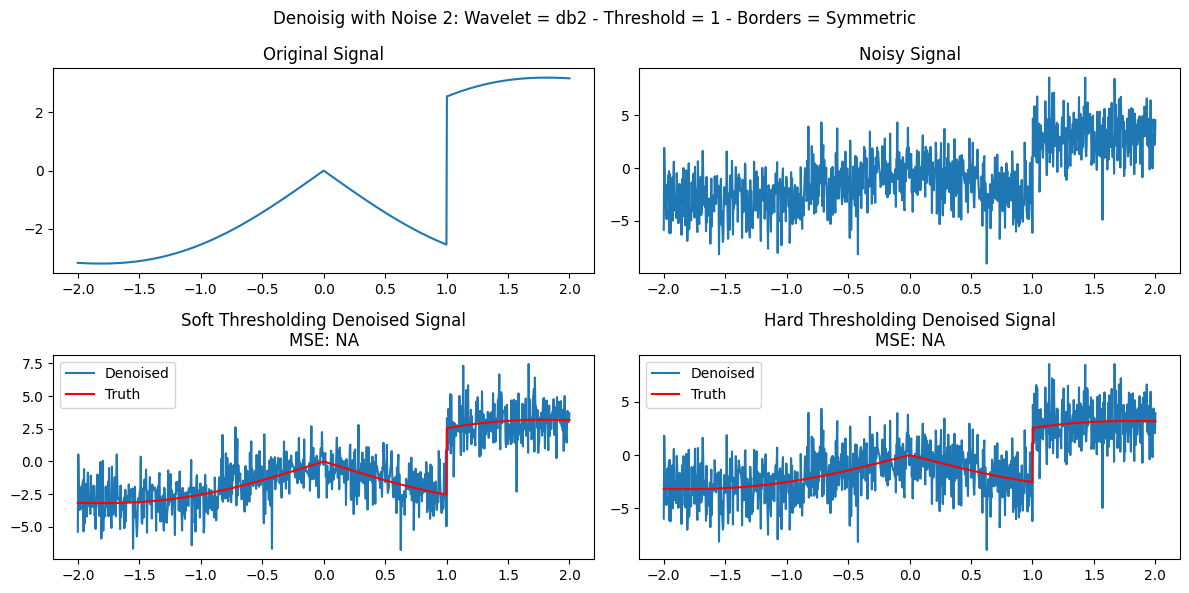

In [8]:
wavelet_type = 'db2'
level = 8
threshold = 1

coeffs, coeffs_thresholded_hard, coeffs_thresholded_soft, f_soft_denoised, f_hard_denoised = denoising_with_wavedec(f_noisy, 
                                                                                                                    wavelet = wavelet_type, 
                                                                                                                    level = level, 
                                                                                                                    threshold = threshold,
                                                                                                                    mode = 'both',
                                                                                                                    image = False)

plot_signals(x, f_vector, f_noisy, f_soft_denoised, f_hard_denoised, threshold = threshold, wavelet = wavelet_type, epsilon = epsilon)

Denoising with DWT, random combination 2

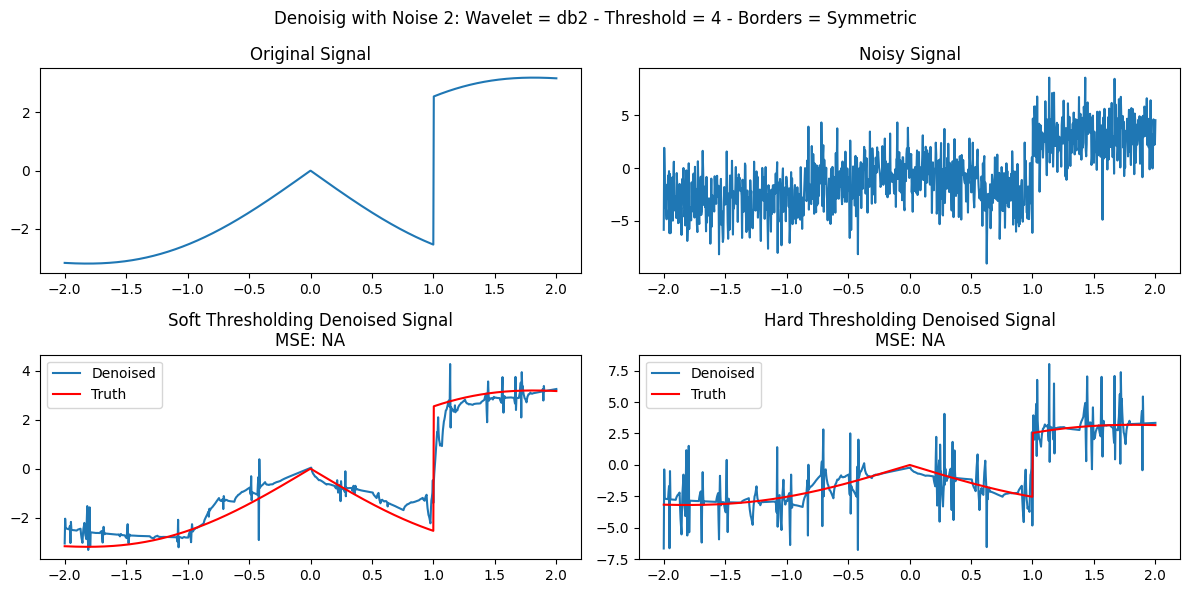

In [9]:
wavelet_type = 'db2'
level = 8
threshold = 4

coeffs, coeffs_thresholded_hard, coeffs_thresholded_soft, f_soft_denoised, f_hard_denoised = denoising_with_wavedec(f_noisy, 
                                                                                                                    wavelet = wavelet_type, 
                                                                                                                    level = level, 
                                                                                                                    threshold = threshold,
                                                                                                                    mode = 'both',
                                                                                                                    image = False)

plot_signals(x, f_vector, f_noisy, f_soft_denoised, f_hard_denoised, threshold = threshold, wavelet = wavelet_type, epsilon = epsilon)

Denoising with DWT, random combination 3

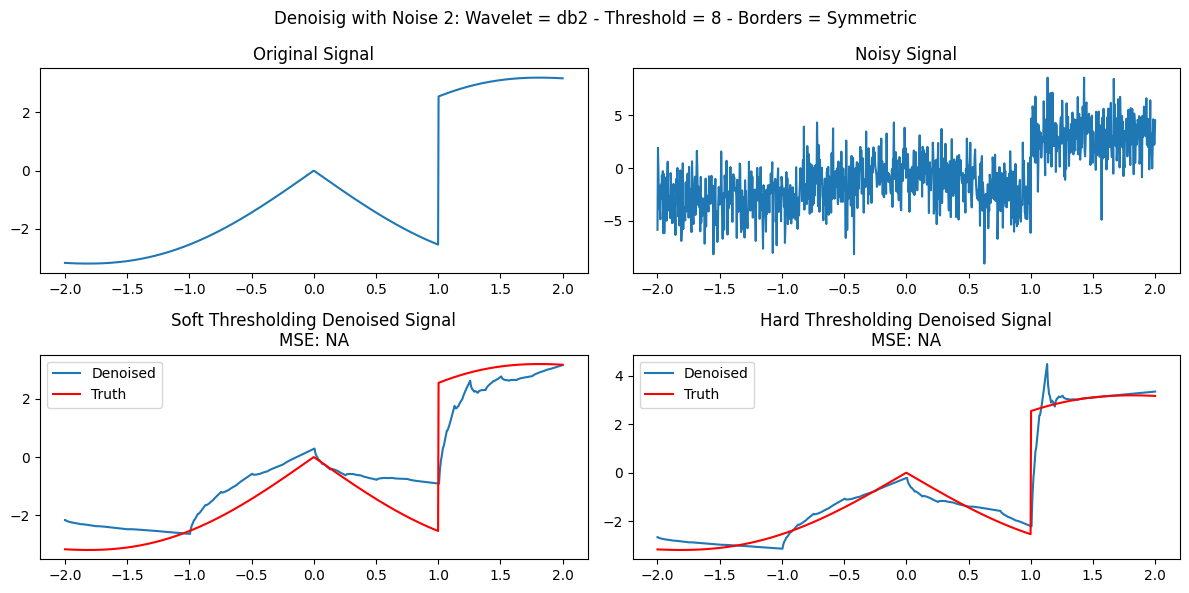

In [10]:
wavelet_type = 'db2'
level = 8
threshold = 8

coeffs, coeffs_thresholded_hard, coeffs_thresholded_soft, f_soft_denoised, f_hard_denoised = denoising_with_wavedec(f_noisy, 
                                                                                                                    wavelet = wavelet_type, 
                                                                                                                    level = level, 
                                                                                                                    threshold = threshold,
                                                                                                                    mode = 'both',
                                                                                                                    image = False)

plot_signals(x, f_vector, f_noisy, f_soft_denoised, f_hard_denoised, threshold = threshold, wavelet = wavelet_type, epsilon = epsilon)

### Q.2.3

Denoising with DWT, random combination + MSE added

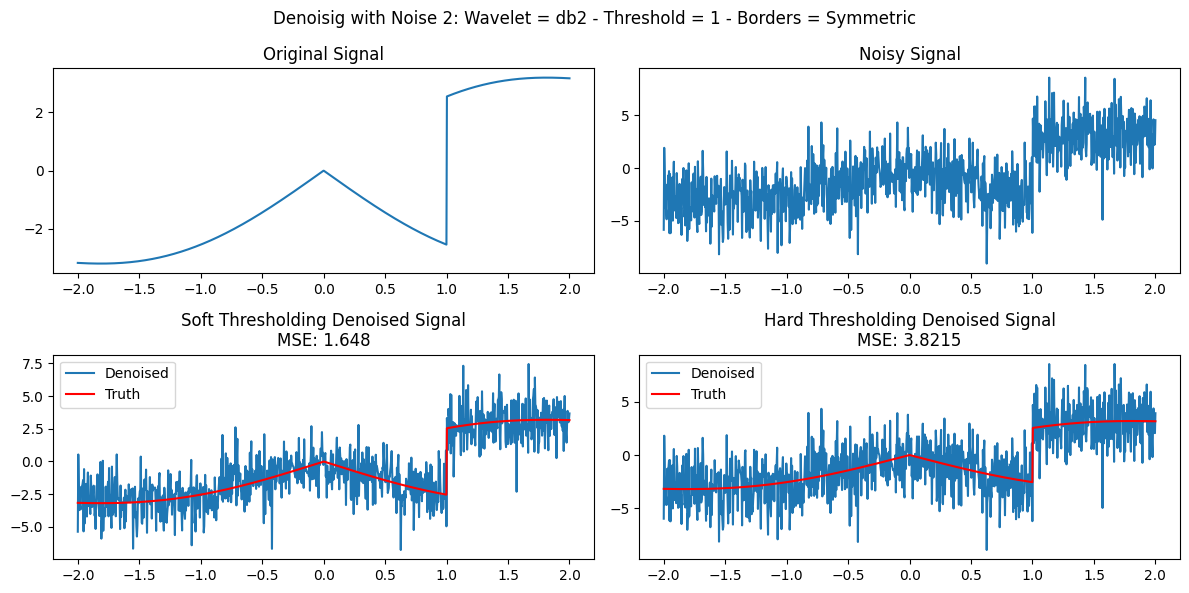

In [11]:
wavelet_type = 'db2'
level = 8
threshold = 1

coeffs, coeffs_thresholded_hard, coeffs_thresholded_soft, f_soft_denoised, f_hard_denoised = denoising_with_wavedec(f_noisy, 
                                                                                                                    wavelet = wavelet_type, 
                                                                                                                    level = level, 
                                                                                                                    threshold = threshold,
                                                                                                                    mode = 'both',
                                                                                                                    image = False)


mse_soft = mean_squared_error(f_vector, f_soft_denoised)
mse_hard = mean_squared_error(f_vector, f_hard_denoised)

plot_signals(x, f_vector, f_noisy, f_soft_denoised, f_hard_denoised, threshold = threshold, 
             wavelet = wavelet_type, epsilon = epsilon, mse_soft = mse_soft, mse_hard = mse_hard)

Hyperparameter calculation using grid-search like algo.

In [14]:
level_list = np.linspace(0,8,9, dtype=int)
threshold_list = np.linspace(0,10, 21)
mse_limit = 100000
wavelet_type = 'db2'
result_val = []

for lev in level_list:
    for thresh in threshold_list:

        coeffs, coeffs_thresholded_hard, coeffs_thresholded_soft, f_soft_denoised, f_hard_denoised = denoising_with_wavedec(f_noisy, 
                                                                                                                            wavelet = wavelet_type, 
                                                                                                                            level = lev, 
                                                                                                                            threshold = thresh,
                                                                                                                            mode = 'both',
                                                                                                                            image = False)


        mse_soft = mean_squared_error(f_vector, f_soft_denoised)
        mse_hard = mean_squared_error(f_vector, f_hard_denoised)
        if mse_soft < mse_limit:
            mse_limit = mse_soft
            result_val = [lev, thresh, mse_limit]
        if mse_hard < mse_limit:
            mse_limit = mse_hard
            result_val = [lev, thresh, mse_limit]

Combination that minimises MSE is selected as hyperparameter and DWT is applied.

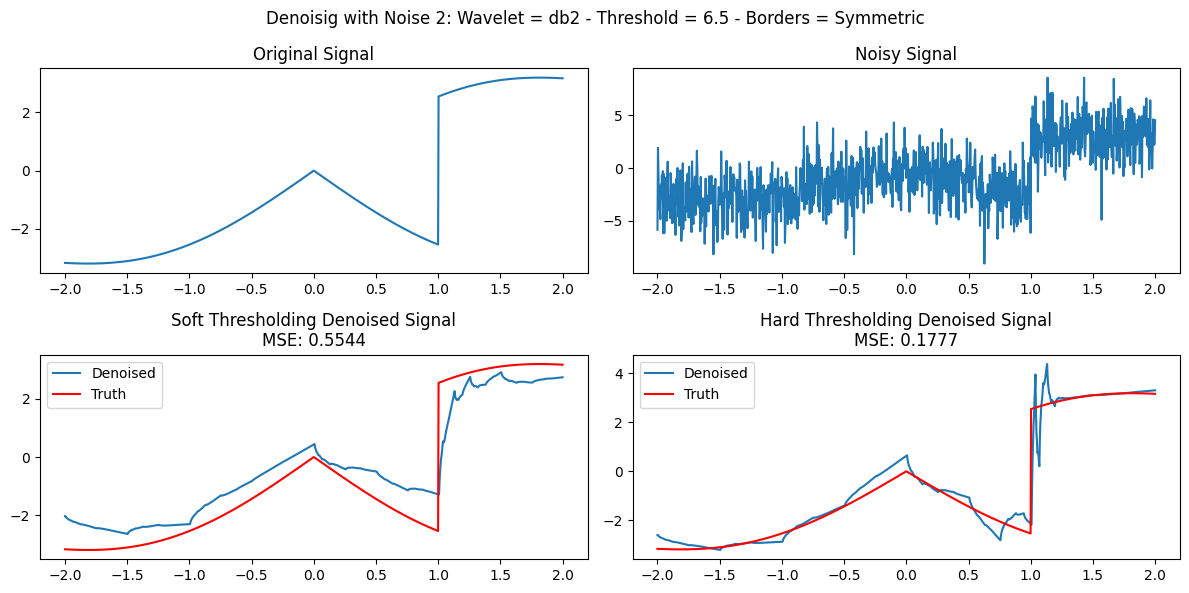

6.5


In [15]:
coeffs, coeffs_thresholded_hard, coeffs_thresholded_soft, f_soft_denoised, f_hard_denoised = denoising_with_wavedec(f_noisy, 
                                                                                                                    wavelet = wavelet_type, 
                                                                                                                    level = result_val[0], 
                                                                                                                    threshold = result_val[1],
                                                                                                                    mode = 'both',
                                                                                                                    image = False)


mse_soft = mean_squared_error(f_vector, f_soft_denoised)
mse_hard = mean_squared_error(f_vector, f_hard_denoised)

plot_signals(x, f_vector, f_noisy, f_soft_denoised, f_hard_denoised, threshold = result_val[1], 
             wavelet = wavelet_type, epsilon = epsilon, mse_soft = mse_soft, mse_hard = mse_hard)

## 2.2 Images with Noise

### Q2.4

Image is loaded

In [16]:
image_path = 'sample_image.png'
original_image = load_image(image_path)

Noise is added

In [17]:
epsilon = 20 
noisy_image = add_noise(original_image, epsilon = epsilon)

### Q2.5

Denoising the image with DWT, random combination

In [18]:
level = 3
threshold = 20
wavelet = 'db2'

coeffs, coeffs_thresholded_hard, coeffs_thresholded_soft, denoised_image_soft, denoised_image_hard = denoising_with_wavedec(
    noisy_image, 
    wavelet = wavelet, 
    level = level, 
    threshold = threshold,
    mode = 'both',
    image = True)

Plot original image, noisy image, denoised with soft thresholding and denoised with hard thresholding

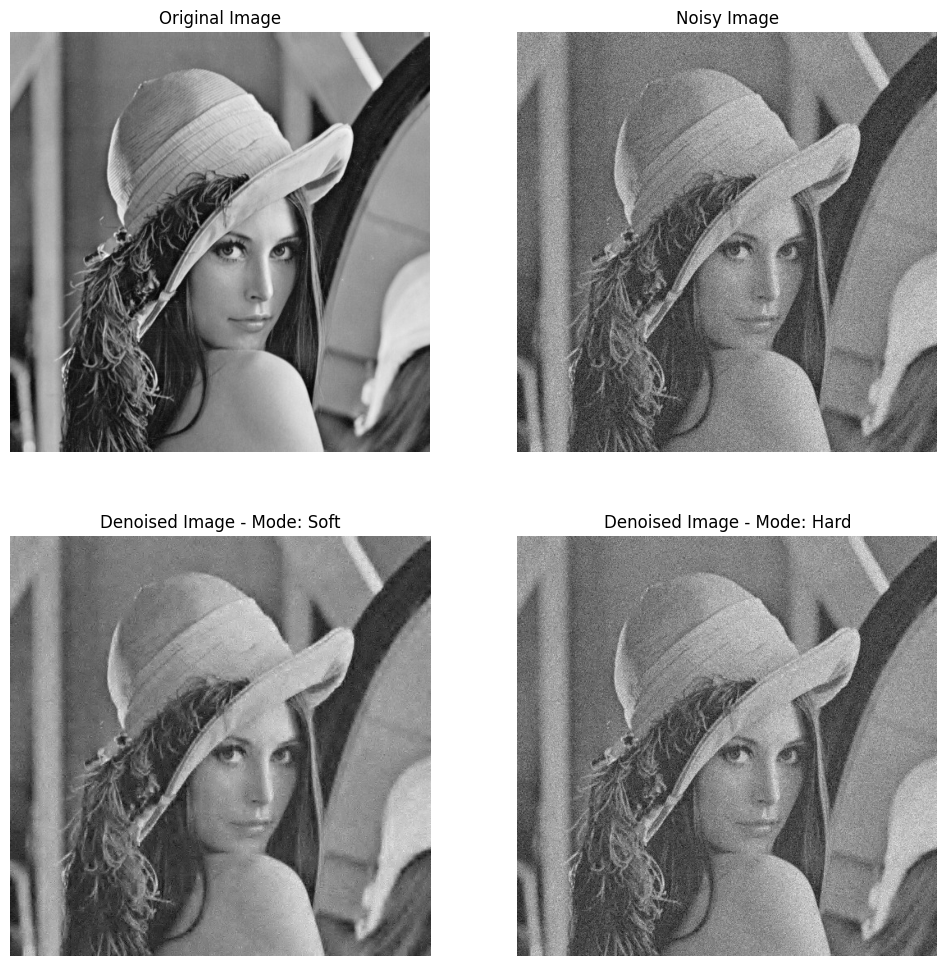

In [19]:
plot_images(original_image, noisy_image, denoised_image_soft, denoised_image_hard)

calculate and output snr value

In [20]:
snr_value = calculate_snr(original_image, denoised_image_soft)
snr_value

22.085560796767012

Hyperparameter calculation using grid-search like algo.

In [21]:
level_list = [1,2,3,4,5,6]
threshold_list = np.linspace(5,100,20)
wavelet_list = ['haar', 'db2', 'bior2.2', 'sym4', 'coif2']
result_list = []
result_wave = []

for wave in wavelet_list:
    for lev in level_list:
        for thresh in threshold_list:
            coeffs, coeffs_thresholded_hard, coeffs_thresholded_soft, denoised_image_soft, denoised_image_hard = denoising_with_wavedec(
                noisy_image, 
                wavelet = wave, 
                level = lev, 
                threshold = thresh,
                mode = 'both',
                image = True)
            
            snr_value_soft = calculate_snr(original_image, denoised_image_soft)
            snr_value_hard = calculate_snr(original_image, denoised_image_hard)
            result_list.append([lev, thresh, snr_value_soft, snr_value_hard])
            result_wave.append(wave)


## 2.3 Using a Redundant Wavelet Transform

### Q2.6

### Q2.7

redundant wavelet transformation (SWT) is applied

In [23]:
wavelet = ['db2', 'sym4', 'coif2'][0]
denoised_image_array_soft, denoised_image_array_hard = denoising_with_swt(noisy_image, 
                                                                        wavelet = wavelet,
                                                                        threshold = 20, 
                                                                        level = 3,
                                                                        start_level = 0,
                                                                        mode = 'both',
                                                                        image = True)

Hyperparameter calculation using grid-search like algo.

In [25]:
level_list = [1,2,3,4,5,6]
threshold_list = np.linspace(5,100,20, dtype='int')
wavelet_list = ['db2', 'sym4', 'coif2']
result_list_swt = []
result_wave_swt = []

for wave in wavelet_list:
    for lev in level_list:
        for thresh in threshold_list:
            denoised_image_array_soft, denoised_image_array_hard = denoising_with_swt(noisy_image, 
                                                                          wavelet = wave,
                                                                          threshold = thresh, 
                                                                          level = lev,
                                                                          start_level = 0)
            
            snr_value_soft = calculate_snr(original_image, denoised_image_array_soft)
            snr_value_hard = calculate_snr(original_image, denoised_image_array_hard)
            result_list_swt.append([lev, thresh, snr_value_soft, snr_value_hard])
            result_wave_swt.append(wave)


### Q2.8

SWT is applied to the problem at Q2.2

In [26]:
epsilon = 2 
wavelet_type = 'db2'
level = 3
start_level = 0
threshold = 4.5

f_noisy = add_noise(f_vector, epsilon=epsilon)

f_soft_denoised, f_hard_denoised = denoising_with_swt(f_noisy,
                                                      wavelet = wavelet_type,
                                                      threshold = threshold, 
                                                      level = level,
                                                      start_level = start_level, 
                                                      mode = 'both',
                                                      image = False)
mse_soft = mean_squared_error(f_vector, f_soft_denoised)
mse_hard = mean_squared_error(f_vector, f_hard_denoised)

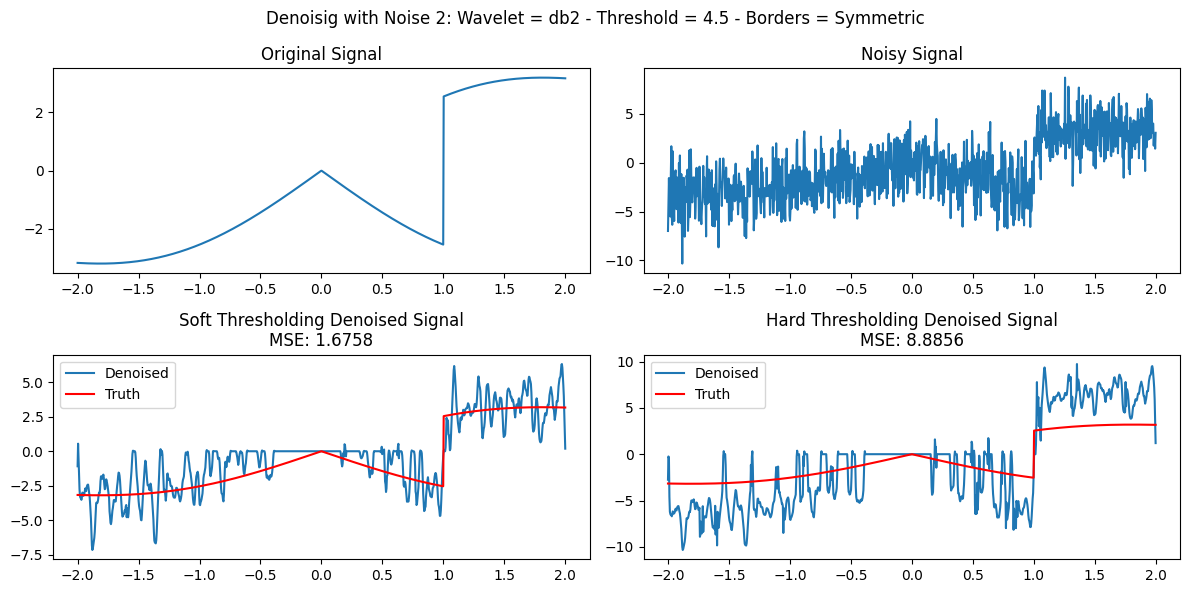

In [27]:
plot_signals(x, f_vector, f_noisy, f_soft_denoised, f_hard_denoised, threshold, wavelet_type, epsilon, mse_soft, mse_hard)

Hyperparameter calculation using grid-search like algo.

In [36]:
level_list = np.linspace(1,8,8, dtype=int)
threshold_list = np.linspace(0,10, 21)[1:]
mse_limit = 100000
wavelet_type = 'db2'
result_val = []

for lev in level_list:
    for thresh in threshold_list:

        f_soft_denoised, f_hard_denoised = denoising_with_swt(f_noisy,
                                                      wavelet = wavelet_type,
                                                      threshold = thresh, 
                                                      level = lev, 
                                                      mode = 'both',
                                                      image = False)
        mse_soft = mean_squared_error(f_vector, f_soft_denoised)
        mse_hard = mean_squared_error(f_vector, f_hard_denoised)
        if mse_soft < mse_limit:
            mse_limit = mse_soft
            result_val = [lev, thresh, mse_limit]
        if mse_hard < mse_limit:
            mse_limit = mse_hard
            result_val = [lev, thresh, mse_limit]

Best combination is outputted

In [37]:
result_val

[3, 4.5, 1.480271382350343]

### Q2.9

image is loaded

In [40]:
image_with_line = original_image.copy()

lines are added

In [41]:
image_with_line[0::10,:] = 0
image_with_line[:,0::10] = 0

swt is applied

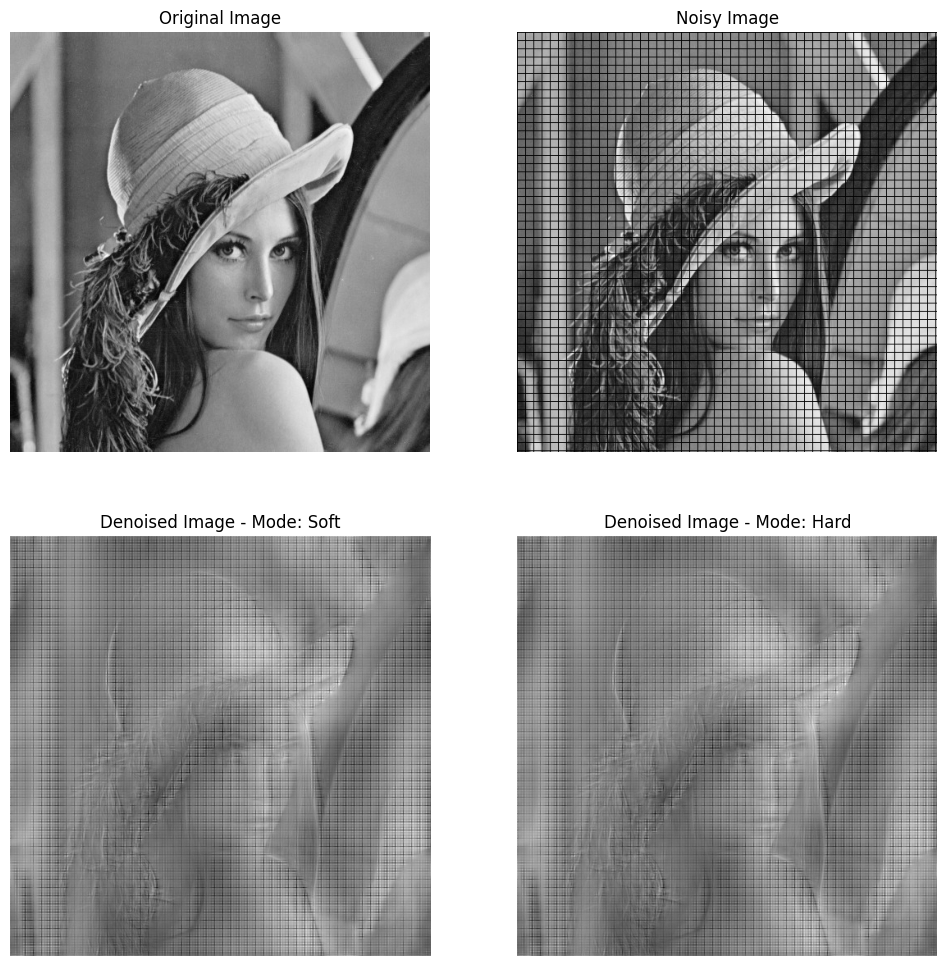

In [63]:
wavelet = 'coif2'
level = 5
start_level = 1
threshold = 50
denoised_image_soft, denoised_image_hard = denoising_with_swt(image_with_line,
                                                              wavelet = wavelet,
                                                              threshold = threshold, 
                                                              level = level,
                                                              start_level = start_level,
                                                              image = True,
                                                              mode = 'both')

plot_images(original_image, image_with_line, denoised_image_soft, denoised_image_hard)

dwt is applied

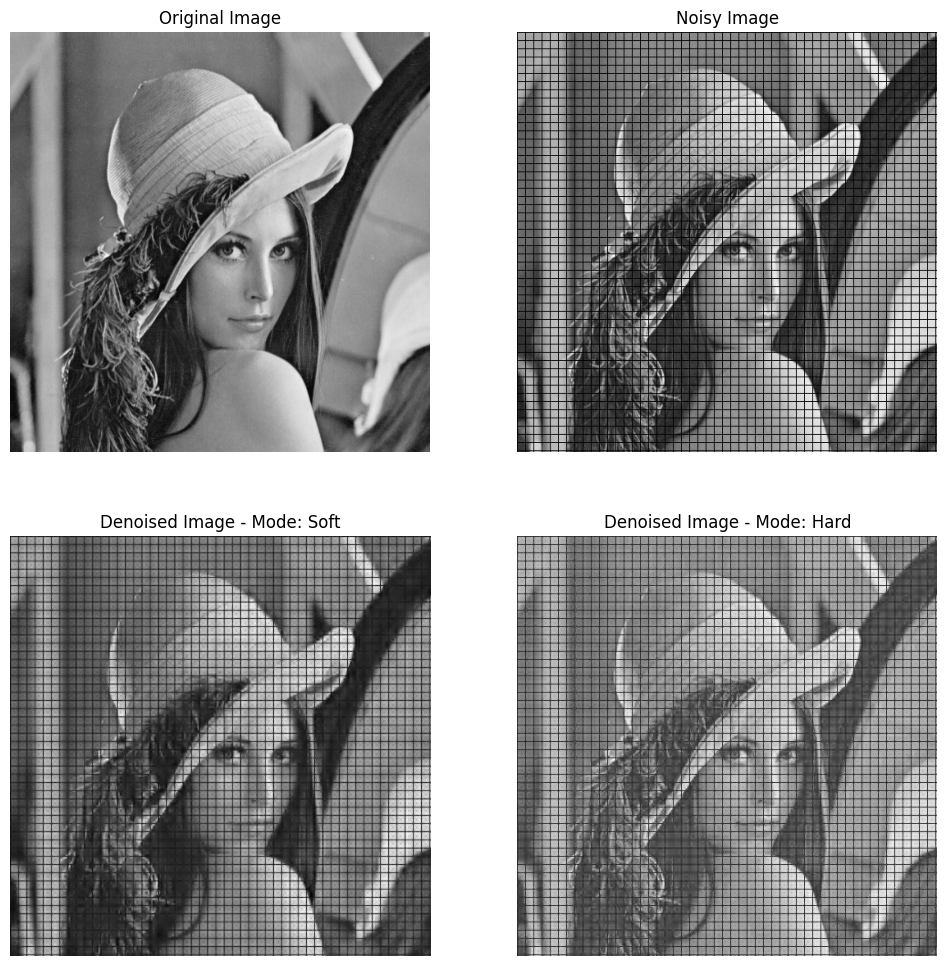

In [64]:
wavelet = 'coif2'
level = 5
threshold = 50
_, _, _, denoised_image_soft, denoised_image_hard = denoising_with_wavedec(image_with_line,
                                                              wavelet =  wavelet,
                                                              threshold = threshold, 
                                                              level = level,
                                                              image = True,
                                                              mode = 'both')
plot_images(original_image, image_with_line, denoised_image_soft, denoised_image_hard)

# 3 - Wavelet-based Inpainting

## 3.1 Inpainting as an Optimisation Problem

## 3.2 Formulation of an inpainting Problem in Python

sample image is loaded

In [303]:
image_path = 'sample_image.png'
original_image = load_image(image_path)

noise added. if random = True, then random noise added, otherwise grid-like lines are added.

In [307]:
# Apply the mask to set values in A to 0
image_with_line = original_image.copy()
mask = create_mask(image_with_line, random = False, mask_size = original_image.shape, true_count=12636)
# mask = create_mask(image_with_line, random = True)
image_with_line[mask] = 0

## 3.3 An Iterative Algortihm

#### Q3.1

Hyperparameter calculation using grid-search like algo. 
It applies the iterative algorithm with different level, wavelet, threshold, wavelet scheme, and thresholding scheme, and store them.

In [274]:
A = image_with_line
B0 = 0

threshold_list = np.linspace(10,100,10)
level_list = [1,2,3,4,5]
max_iter = 500
level = 7
wavelet_list = ['db2', 'sym4', 'coif2']
results_all = []
results_wave = []

for wave in wavelet_list:
    for thresh in threshold_list:
        for lev in level_list:
            image_wavedec_soft, image_wavedec_hard, image_swt_soft, image_swt_hard = wavelet_inpainting(A, mask, B0, max_iter, 
                                                                                                        wavelet = wave, 
                                                                                                        level = lev, 
                                                                                                        threshold = thresh)

            results_all.append([lev, thresh, calculate_snr(original_image, image_wavedec_soft),calculate_snr(original_image, image_wavedec_hard), calculate_snr(original_image, image_swt_soft), calculate_snr(original_image, image_swt_hard)])
            results_wave.append(wave)

/Users/Serkan/opt/anaconda3/envs/wavelet/lib/python3.9/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


In [275]:
max_row, max_col = np.unravel_index(np.argmax(np.array(results_all)[:,2:]), (150,4))
hard_thresh = max_col % 2 == 1
max_wave = results_wave[max_row]
max_level, max_thresh, _, _, _, _= results_all[max_row]
max_level, max_thresh, max_wave, hard_thresh, max_col

(5, 10.0, 'coif2', False, 0)

applies the best combination and shows the image

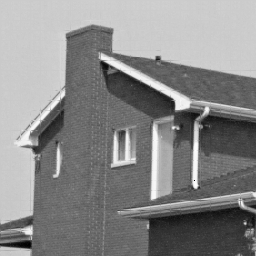

In [276]:
max_result = [image_wavedec_soft, image_wavedec_hard, image_swt_soft, image_swt_hard] = wavelet_inpainting(A, mask, B0, 1000,
                                                                                                          wavelet = max_wave, 
                                                                                                          level = max_level, 
                                                                                                          threshold = max_thresh)
Image.fromarray(np.uint8(max_result[max_col]))

creates plot for grid-serach-like results

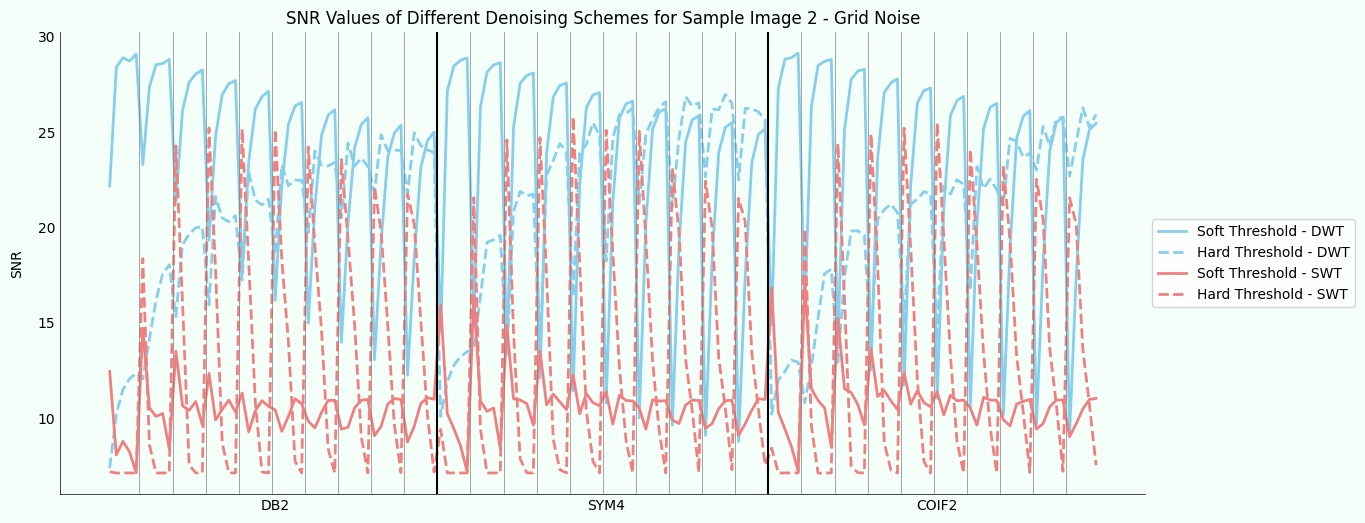

In [279]:
# Create the plot with custom styling
fig, ax = plt.subplots(figsize=(14, 6))  # Adjust the figure size

# Plot the data with a colorful line
ax.plot(np.array(results_all)[:,2], '-', label = 'Soft Threshold - DWT', color='skyblue', linewidth=2)
ax.plot(np.array(results_all)[:,3], '--', label = 'Hard Threshold - DWT', color='skyblue', linewidth=2)
ax.plot(np.array(results_all)[:,4], '-', label = 'Soft Threshold - SWT', color='lightcoral', linewidth=2)
ax.plot(np.array(results_all)[:,5], '--', label = 'Hard Threshold - SWT', color='lightcoral', linewidth=2)
for item in np.linspace(4.5,149.5,30)[:-1]:
    ax.axvline(item, c = 'gray', lw = 0.5)

# plt.plot(np.array(results_all)[:,3], 'r--', label = 'Hard Threshold - DWT')
# plt.plot(np.array(results_all)[:,4], 'g-', label = 'Soft Threshold - SWT')
# plt.plot(np.array(results_all)[:,5], 'g--', label = 'Hard Threshold - SWT')
plt.axvline(49.5, c='k')
plt.axvline(99.5, c='k')
# Set the custom ticks on the x-axis
custom_xticks = [(0, 50, 'DB2'), (50, 100, 'SYM4'), (100, 150, 'COIF2')]
xtick_positions = [(start + end) / 2 for start, end, _ in custom_xticks]
xtick_labels = [label for _, _, label in custom_xticks]
ax.set_xticks(xtick_positions)
ax.set_xticklabels(xtick_labels)

# Customize the background color
fig.patch.set_facecolor('mintcream')  # Set figure background color
ax.set_facecolor('mintcream')  # Set Axes background color

# Add grid lines
ax.grid(color='white', linestyle='--', linewidth=0.5)

# Add labels and title
ax.set_ylabel('SNR')
ax.set_title('SNR Values of Different Denoising Schemes for Sample Image 2 - Grid Noise')

# Customize legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add rounded corners to the plot frame
ax.set_axisbelow(True)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.tick_params(axis='both', which='both', length=0)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# Show the plot
plt.show()
